In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['pdf.fonttype'] = 42

In [4]:
data = pd.read_csv("../data/Microarray_PCA_df.csv",index_col=0)

score = pd.read_csv("../data/ACRG_PUL_score.csv",sep=",",index_col=0)

a = data.loc[score.index,["0","1"]]

In [5]:
X_embedded = TSNE(n_components=2,random_state=0).fit_transform(a)
X_embedded.shape

/home/jovi/anaconda3/envs/r4/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jovi/anaconda3/envs/r4/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(268, 2)

In [6]:
score.groupby("Subtype").count()

,PUL_Score
Subtype,
MSI-H & TILs-H,24
MSS-NR,217
MSS-PR,27


/home/jovi/anaconda3/envs/r4/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jovi/anaconda3/envs/r4/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


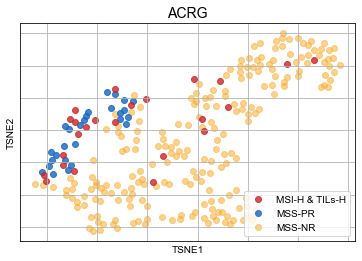

In [16]:
X_embedded = TSNE(n_components=2,random_state=120).fit_transform(a)
X_embedded.shape
fig = plt.figure()
fig.set_size_inches(6,4)
plt.scatter(X_embedded[51:,0], X_embedded[51:,1],c="#F9A825",label="MSS-NR",alpha=0.5)
plt.scatter(X_embedded[24:51,0], X_embedded[24:51,1],c="#1565C0",label="MSS-PR",alpha=0.8)
plt.scatter(X_embedded[:24,0], X_embedded[:24,1],c="#C62828",label="MSI-H & TILs-H",alpha=0.8)
handles, labels = plt.gca().get_legend_handles_labels()
order = [2,1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc=4,fontsize=10)
plt.grid(True)
plt.title("ACRG",fontsize=14)
plt.tick_params(left=False,
                    bottom=False,
                    labelleft=False,
                    labelbottom=False)
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
frame1.axes.yaxis.set_ticklabels([])
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.savefig("ARGC_tsne.pdf",bbox_inches='tight',dpi=600)

/home/jovi/anaconda3/envs/r4/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jovi/anaconda3/envs/r4/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


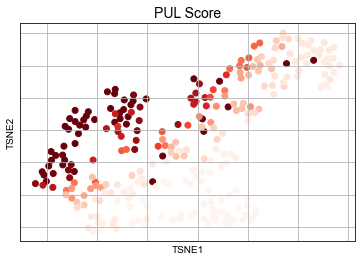

In [15]:
X_embedded = TSNE(n_components=2,random_state=120).fit_transform(a)
X_embedded.shape
fig = plt.figure()
fig.set_size_inches(6,4)
plt.scatter(X_embedded[:,0], X_embedded[:,1],c=score["PUL_Score"],label="aa",cmap='Reds')
plt.grid(True)
plt.title("PUL Score",fontsize=14)
plt.tick_params(left=False,
                    bottom=False,
                    labelleft=False,
                    labelbottom=False)
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
frame1.axes.yaxis.set_ticklabels([])
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
# plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
# cax = plt.axes([0.85, 0.1, 0.02, 0.8])
# plt.colorbar(cax=cax,shrink=0.5)
# plt.savefig("ColorBar_legend.pdf",bbox_inches='tight',dpi=600)
plt.savefig("ARGC_tsne_colorbar.pdf",bbox_inches='tight',dpi=600)